In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import astropy.units as u

In [6]:
#DEFINES RECOIL VELOCITY FORMULA

#Assumes e = 0 (orbit circularizes before merger)
#Assumes theta = 0 (black holes inline at merger)
#Assumes xi = 0 or 90 (all in-plane contribution to recoil in direction or 90 degrees to v_m)


#Assign fitting constants
A = 12000
B = -0.93
H = 7300
K = 60000

#Define recoil velocity operator
def calc_recoil_velocity(q, a, phi, xi):
    p = (q**2)/((1+q)**5)
    a_par = a*np.cos(phi)
    if xi == 0:
        v_rec = (p*(1-q))*np.sqrt((A**2)*((1+(B*(q/((1+q)**2))))**2) + (H**2)*(a_par)**2 + 2*A*H*(1+(B*(q/((1+q)**2))))*a_par)
    elif xi == np.pi/2:
        v_rec = (p*(1-q))*np.sqrt((A**2)*((1+(B*(q/((1+q)**2))))**2) + (H**2)*(a_par)**2)
    else:
        v_rec = 0
    
    return v_rec

The max recoil velocity for this orientation is 175.21062968472958
The mass ratio that produces the max recoil velocity for this orientation is 0.36236236236236236


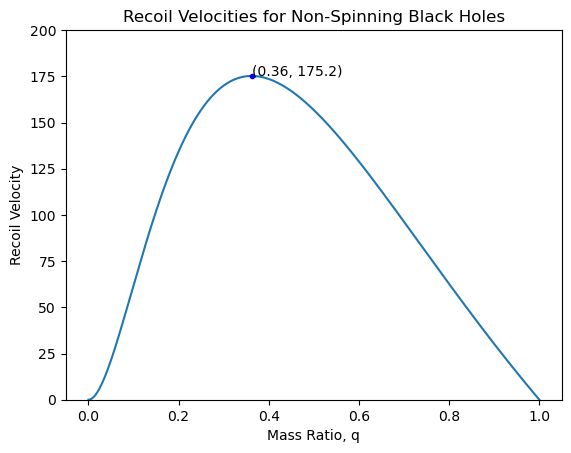

In [10]:
# MASS RATIO BY SPIN (NO SPIN), CIRCULAR ORBIT

n = 1000
q_values = np.linspace(0, 1, n)
a_values = np.linspace(-1, 1, n)

recoil_velocities_q = []
for q in q_values:
    recoil_velocity = calc_recoil_velocity(q, 0, 0, 0)
    #print(recoil_velocity)
    recoil_velocities_q.append(recoil_velocity)

escape_velocity_q = []
for recoil in recoil_velocities_q:
    if 49 < recoil < 50:
        escape_velocity_q.append(recoil)
    else: 
        escape_velocity_q.append(0)

v_max = np.max(recoil_velocities_q)
v_max_index = recoil_velocities_q.index(v_max)
q_max = q_values[v_max_index]

print('The max recoil velocity for this orientation is', v_max)
print('The mass ratio that produces the max recoil velocity for this orientation is', q_max)

plt.plot(q_values, recoil_velocities_q)
plt.plot(q_max, v_max, marker='o', markersize = 3, color ='b')
plt.text(q_max, v_max, '(0.36, 175.2)')
plt.ylim(0, 200)
plt.title('Recoil Velocities for Non-Spinning Black Holes')
plt.xlabel('Mass Ratio, q')
plt.ylabel('Recoil Velocity')
#plt.savefig('Case1a_NoSpin_fig.png') #SAVE AS 'NoSpin_fig.png'
 

The max recoil velocity for this orientation is 175.21062968472958
The mass ratio that produces the max recoil velocity for this orientation is 0.36236236236236236


Text(0, 0.5, 'Recoil Velocity')

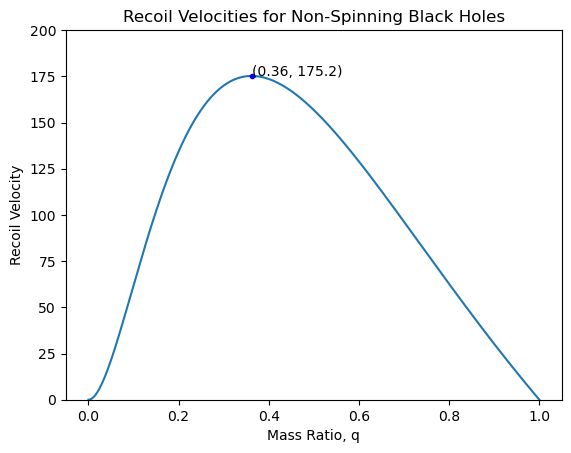

In [8]:
# MASS RATIO BY SPIN (NO SPIN), CIRCULAR ORBIT

n = 1000
q_values = np.linspace(0, 1, n)
a_values = np.linspace(-1, 1, n)

recoil_velocities_q = []
for q in q_values:
    recoil_velocity = calc_recoil_velocity(q, 0, 0, np.pi/2)
    #print(recoil_velocity)
    recoil_velocities_q.append(recoil_velocity)

escape_velocity_q = []
for recoil in recoil_velocities_q:
    if 49 < recoil < 50:
        escape_velocity_q.append(recoil)
    else: 
        escape_velocity_q.append(0)

v_max = np.max(recoil_velocities_q)
v_max_index = recoil_velocities_q.index(v_max)
q_max = q_values[v_max_index]

print('The max recoil velocity for this orientation is', v_max)
print('The mass ratio that produces the max recoil velocity for this orientation is', q_max)

plt.plot(q_values, recoil_velocities_q)
plt.plot(q_max, v_max, marker='o', markersize = 3, color ='b')
plt.text(q_max, v_max, '(0.36, 175.2)')
plt.ylim(0, 200)
plt.title('Recoil Velocities for Non-Spinning Black Holes')
plt.xlabel('Mass Ratio, q')
plt.ylabel('Recoil Velocity')
#plt.savefig('Case1b_NoSpin_fig.pdf') #SAVE AS 'NoSpin_fig.png'
 

The max recoil velocity for this orientation is 305.5891753763243


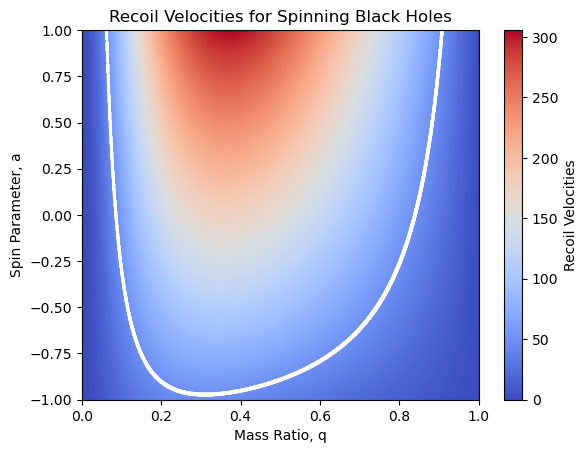

In [8]:
# MASS RATIO BY SPIN (ALIGNED, PARALLEL TO ANGULAR MOMENTUM), CIRCULAR ORBIT

n = 1000
q_values = np.linspace(0, 1, n)
a_values = np.linspace(-1, 1, n)

recoil_velocities_a = []
for a in a_values:
    for q in q_values:
        recoil_velocity = calc_recoil_velocity(q, a, 0, 0)
        #print(recoil_velocity)
        recoil_velocities_a.append(recoil_velocity)
recoil_velocities_aplot = np.reshape(recoil_velocities_a, (n, n))

escape_velocity_a = []
for recoil in recoil_velocities_a:
    if 49 < recoil < 50:
        escape_velocity_a.append(recoil)
    else: 
        escape_velocity_a.append(0)
escape_velocity_aplot = np.reshape(escape_velocity_a, (n, n))

Q, A_i = np.meshgrid(q_values, a_values)
fig2 = plt.pcolormesh(Q, A_i, recoil_velocities_aplot, cmap = cm.coolwarm)
plt.colorbar(label = 'Recoil Velocities')
plt.contour(Q, A_i, escape_velocity_aplot, colors='w', linewidths = 1.5)
plt.title('Recoil Velocities for Spinning Black Holes')
plt.xlabel('Mass Ratio, q')
plt.ylabel('Spin Parameter, a')
#plt.savefig('Case1a_Spin_fig.png')

print('The max recoil velocity for this orientation is', np.max(recoil_velocities_a)) 

The max recoil velocity for this orientation is 218.38168002846825


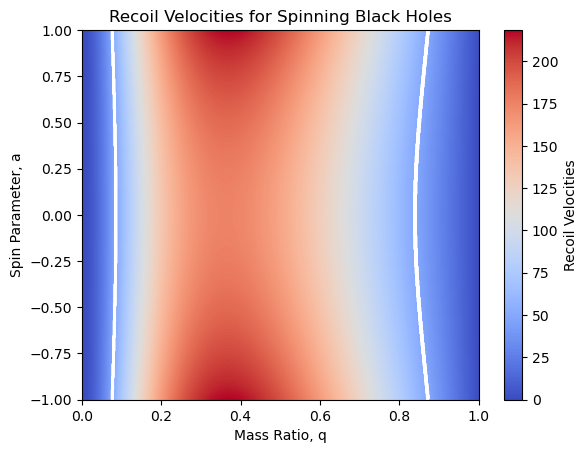

In [7]:
# MASS RATIO BY SPIN (ALIGNED, PARALLEL TO ANGULAR MOMENTUM), CIRCULAR ORBIT

n = 1000
q_values = np.linspace(0, 1, n)
a_values = np.linspace(-1, 1, n)

recoil_velocities_a = []
for a in a_values:
    for q in q_values:
        recoil_velocity = calc_recoil_velocity(q, a, 0, np.pi/2)
        #print(recoil_velocity)
        recoil_velocities_a.append(recoil_velocity)
recoil_velocities_aplot = np.reshape(recoil_velocities_a, (n, n))

escape_velocity_a = []
for recoil in recoil_velocities_a:
    if 49 < recoil < 50:
        escape_velocity_a.append(recoil)
    else: 
        escape_velocity_a.append(0)
escape_velocity_aplot = np.reshape(escape_velocity_a, (n, n))

Q, A_i = np.meshgrid(q_values, a_values)
fig2 = plt.pcolormesh(Q, A_i, recoil_velocities_aplot, cmap = cm.coolwarm)
plt.colorbar(label = 'Recoil Velocities')
plt.contour(Q, A_i, escape_velocity_aplot, colors='w', linewidths = 1.5)
plt.title('Recoil Velocities for Spinning Black Holes')
plt.xlabel('Mass Ratio, q')
plt.ylabel('Spin Parameter, a')
#plt.savefig('Case1b_Spin_fig.png')

print('The max recoil velocity for this orientation is', np.max(recoil_velocities_a)) 